<a href="https://colab.research.google.com/github/devikaamalkar/FitCare/blob/main/CovidColdFlu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import scipy.stats as ss
from sklearn.model_selection import train_test_split # Train/Test split
from sklearn.preprocessing import StandardScaler # Normalization
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import confusion_matrix # Confusion Matrix
from matplotlib.colors import ListedColormap # For colours
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_text

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/axs180224/Machine-Learning/main/large_data.csv')
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [ ]:
X=df[['COUGH', 'MUSCLE_ACHES', 'TIREDNESS','SORE_THROAT', 'RUNNY_NOSE','STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'SHORTNESS_OF_BREATH', 'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'SNEEZING','PINK_EYE']]
y=df[['TYPE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [ ]:
#%% Training the Decision Tree Classifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=9, min_samples_leaf=20)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=20, random_state=42)

In [ ]:
#%% Test Accuracy
y_predict = clf_model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9220155968806238

In [ ]:
col_names = ["COUGH", "MUSCLE_ACHES", 'TIREDNESS','SORE_THROAT', 'RUNNY_NOSE','STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 
             'SHORTNESS_OF_BREATH', 'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'SNEEZING','PINK_EYE']


In [ ]:
r = export_text(clf_model, feature_names=col_names)
print(r)

|--- ITCHY_INNER_EAR <= 0.50
|   |--- PINK_EYE <= 0.50
|   |   |--- ITCHY_EYES <= 0.50
|   |   |   |--- ITCHY_NOSE <= 0.50
|   |   |   |   |--- ITCHY_MOUTH <= 0.50
|   |   |   |   |   |--- RUNNY_NOSE <= 0.50
|   |   |   |   |   |   |--- STUFFY_NOSE <= 0.50
|   |   |   |   |   |   |   |--- LOSS_OF_SMELL <= 0.50
|   |   |   |   |   |   |   |   |--- LOSS_OF_TASTE <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: COVID
|   |   |   |   |   |   |   |   |--- LOSS_OF_TASTE >  0.50
|   |   |   |   |   |   |   |   |   |--- class: FLU
|   |   |   |   |   |   |   |--- LOSS_OF_SMELL >  0.50
|   |   |   |   |   |   |   |   |--- SHORTNESS_OF_BREATH <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: FLU
|   |   |   |   |   |   |   |   |--- SHORTNESS_OF_BREATH >  0.50
|   |   |   |   |   |   |   |   |   |--- class: FLU
|   |   |   |   |   |   |--- STUFFY_NOSE >  0.50
|   |   |   |   |   |   |   |--- VOMITING <= 0.50
|   |   |   |   |   |   |   |   |--- SHORTNESS_OF_BREATH <= 0.50
|   |   |  

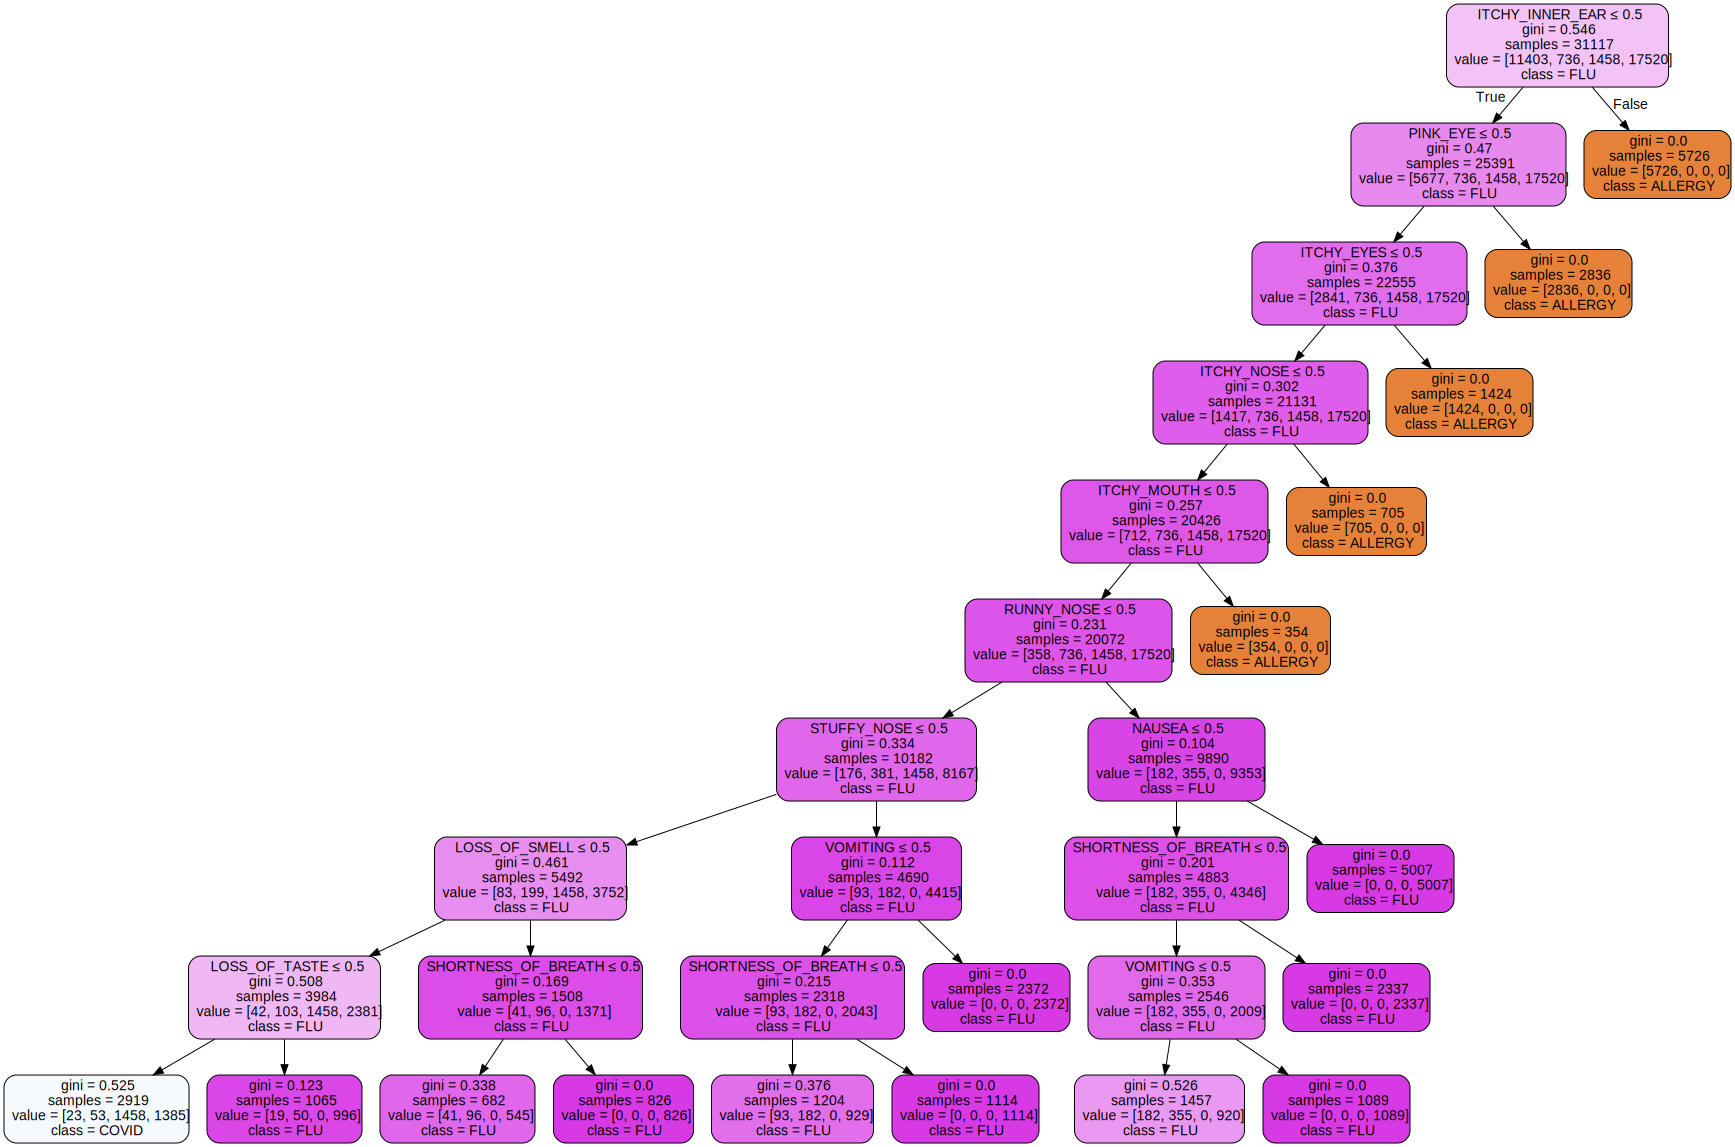

In [ ]:
#%% Plotting Decision Tree
target = list(df['TYPE'].unique())
feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model,
                                out_file=None,
                                feature_names=feature_names,
                                class_names=target,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

graph
